In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [10]:
# Load sentiment data
sentiment_df = pd.read_csv("D:/primetrade.ai_DS_task/fear_greed_index.csv")
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Load trader data
trader_df = pd.read_csv("D:\primetrade.ai_DS_task\historical_data.csv")
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'])

In [11]:
# Extract date from trader timestamp for joining
trader_df['date'] = trader_df['Timestamp IST'].dt.date
trader_df['date'] = pd.to_datetime(trader_df['date'])

# Join sentiment to trader data
merged_df = pd.merge(trader_df, sentiment_df[['date', 'classification']], on='date', how='left')

# Drop rows with missing sentiment (if any)
merged_df = merged_df.dropna(subset=['classification'])


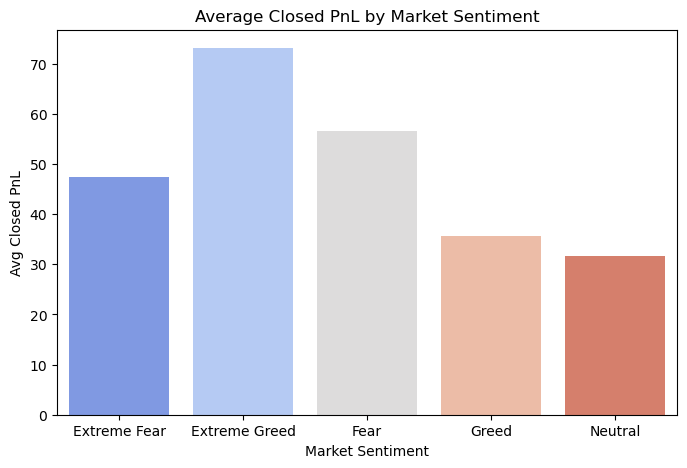

In [12]:
# Aggregate average PnL by sentiment
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

# Visualize
plt.figure(figsize=(8,5))
sns.barplot(data=avg_pnl_by_sentiment, x='classification', y='Closed PnL', palette='coolwarm')
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Avg Closed PnL')
plt.show()


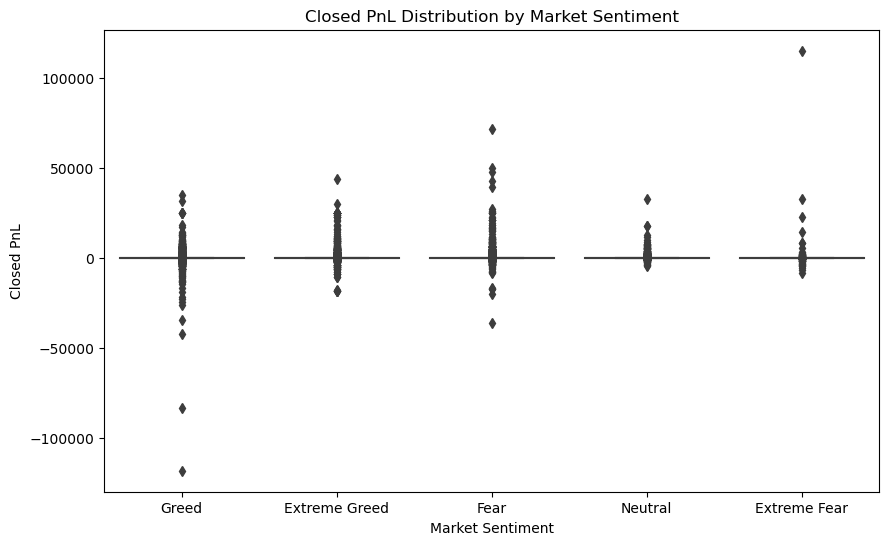

In [13]:
# Distributing PnL by sentiment

plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Closed PnL Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.show()


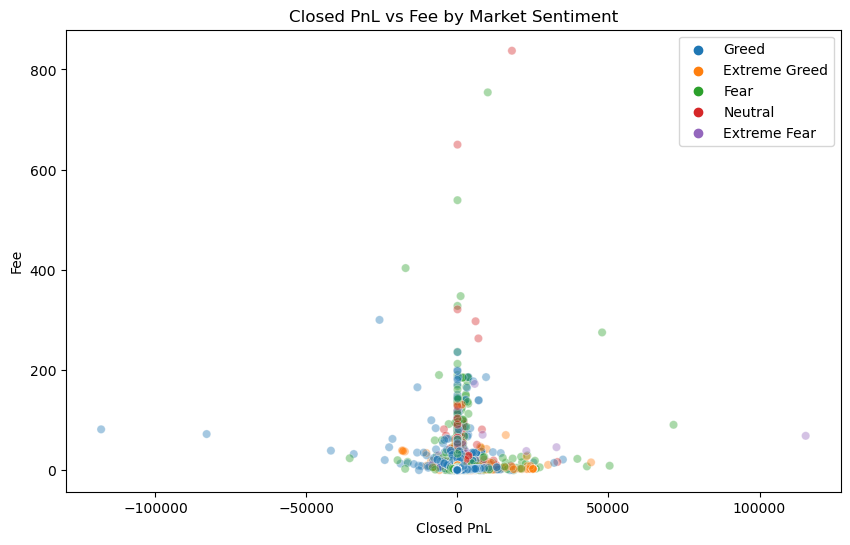

In [14]:
# Impact of Leverage in Fear and Greed

plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_df, x='Closed PnL', y='Fee', hue='classification', alpha=0.4)
plt.title('Closed PnL vs Fee by Market Sentiment')
plt.xlabel('Closed PnL')
plt.ylabel('Fee')
plt.legend()
plt.show()


In [15]:
#RESULTS

merged_df.to_csv("trader_with_sentiment.csv", index=False)
